<a href="https://colab.research.google.com/github/Mighty2Skiddie/Digit_Recognition_Keras/blob/main/Digit_Recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
data=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')

In [ ]:
X=data.drop('label',axis=1)
y=data['label'].values

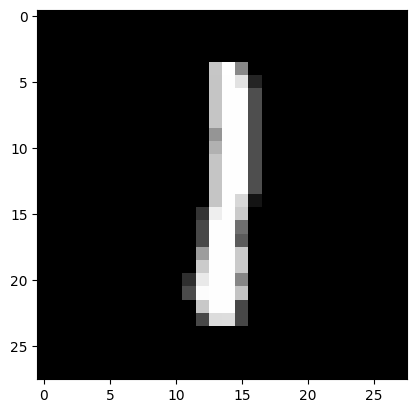

In [ ]:
img=X.iloc[41].values.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
set(y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=5,validation_data=(X_test,y_test))


Epoch 1/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1253 - loss: nan - val_accuracy: 0.0931 - val_loss: nan
Epoch 2/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0943 - loss: nan - val_accuracy: 0.0931 - val_loss: nan
Epoch 3/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1003 - loss: nan - val_accuracy: 0.0931 - val_loss: nan
Epoch 4/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1020 - loss: nan - val_accuracy: 0.0931 - val_loss: nan
Epoch 5/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0972 - loss: nan - val_accuracy: 0.0931 - val_loss: nan


In [ ]:
y_pred=model.predict(X_test).argmax(axis=1)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
the predicted value of lable is 0


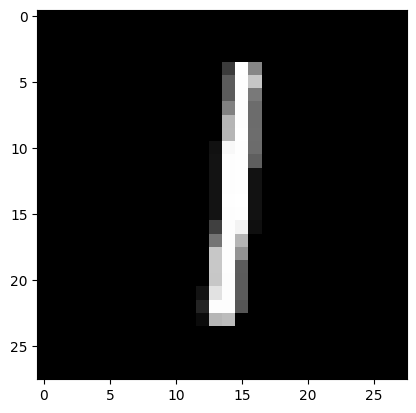

In [ ]:
img=X_test.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print('the predicted value of lable is',model.predict(X_test).argmax(axis=1)[2])
plt.show()

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18351,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18352,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18353,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18354,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
accuracy_score(y_pred,y_test)

0.09313725490196079

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([9, 4, 1, ..., 6, 4, 1])

In [ ]:
y_pred.shape

(1836,)

In [ ]:
y_train_pred=model.predict(X_train).argmax(axis=1)

517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train

array([1, 9, 0, ..., 2, 6, 0])

In [ ]:
accuracy_score(y_train_pred,y_train)

0.0957744457995552

In [ ]:
y_train_pred.shape

(13939,)